<p style="font-family: Arial; font-size:1.4em;color:black;"><h1><center>Mini Project Analysis</center></h1></p>
<p style="font-family: Arial; font-size:1.4em;color:black;">Name : PRERNA KAPOOR <br>Batch : G32 Python</p>
<h1 style='text-align: left;'>Problem Statement</h1>
<p >
    import pandas as pd
import numpy as np

num_students = 80
num_subjects = np.random.randint(6, 9)  

data = {
    'Class': [],
    'Student_ID': [],
    'Name': []
}
for i in range(1, num_students + 1):
    data['Class'].append('Class A')
    data['Student_ID'].append(i)
    data['Name'].append(f'Student_{i}')
    for j in range(1, num_subjects + 1):
        data[f'Subject_{j}'] = np.random.randint(0, 101, num_students)


df = pd.DataFrame(data)

for _ in range(30):  
    row_idx = np.random.randint(0, num_students)
    col_idx = np.random.randint(3, df.shape[1])  
    df.iat[row_idx, col_idx] = np.nan

df



Using the provided dataframe containing student marks:

Data Export: Save this dataframe to a CSV file named "student_marks.csv." Make sure to include the index in the CSV file.

Data Preprocessing: After saving the data to the CSV file, load it back into a new dataframe. Perform the following preprocessing steps:

Rename the columns as follows:
Rename "Student_ID" to "StudentID"
Rename "Name" to "StudentName"
Rename all "Subject_X" columns to "SubjectX" (where X is the subject number).
Handle missing values:
Replace missing values in numerical columns (e.g., SubjectX) with the mean value of that column.
Analyze the data:
Calculate and display the summary statistics for each subject (mean, median, standard deviation, min, max).
Plot a histogram for one of the subjects to visualize the distribution of marks.
Machine Learning Model: After preprocessing the data, build a machine learning model to predict a student's performance in "SubjectX" based on the other subjects' marks. Choose an appropriate machine learning algorithm, split the data into training and testing sets, train the model, and evaluate its performance using an appropriate metric (e.g., mean squared error for regression).

Please provide the code and explanations for each step.
</p>

In [1]:
#importing Dataframe 
import pandas as pd
import numpy as np

num_students = 80
num_subjects = np.random.randint(6, 9)  

data = {
    'Class': [],
    'Student_ID': [],
    'Name': []
}
for i in range(1, num_students + 1):
    data['Class'].append('Class A')
    data['Student_ID'].append(i)
    data['Name'].append(f'Student_{i}')
    for j in range(1, num_subjects + 1):
        data[f'Subject_{j}'] = np.random.randint(0, 101, num_students)


df = pd.DataFrame(data)

for _ in range(30):  
    row_idx = np.random.randint(0, num_students)
    col_idx = np.random.randint(3, df.shape[1])  
    df.iat[row_idx, col_idx] = np.nan

df

,Class,Student_ID,Name,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7
0,Class A,1,Student_1,29.0,NaN,51.0,11.0,31.0,37.0,41.0
1,Class A,2,Student_2,91.0,64.0,32.0,8.0,89.0,3.0,1.0
2,Class A,3,Student_3,43.0,74.0,71.0,75.0,63.0,72.0,72.0
3,Class A,4,Student_4,35.0,11.0,16.0,38.0,72.0,99.0,50.0
4,Class A,5,Student_5,79.0,64.0,61.0,12.0,NaN,78.0,26.0
...,...,...,...,...,...,...,...,...,...,...
75,Class A,76,Student_76,17.0,35.0,61.0,47.0,NaN,57.0,85.0
76,Class A,77,Student_77,80.0,21.0,19.0,15.0,18.0,60.0,41.0
77,Class A,78,Student_78,13.0,33.0,83.0,84.0,80.0,96.0,NaN
78,Class A,79,Student_79,5.0,29.0,37.0,45.0,95.0,44.0,57.0


<h1 style='text-align: left;'>Data Export</h1>

In [2]:
df.to_csv("student_marks.csv", index=False)

In [3]:
student_marks = pd.read_csv("student_marks.csv")
student_marks.head()

,Class,Student_ID,Name,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7
0,Class A,1,Student_1,29.0,NaN,51.0,11.0,31.0,37.0,41.0
1,Class A,2,Student_2,91.0,64.0,32.0,8.0,89.0,3.0,1.0
2,Class A,3,Student_3,43.0,74.0,71.0,75.0,63.0,72.0,72.0
3,Class A,4,Student_4,35.0,11.0,16.0,38.0,72.0,99.0,50.0
4,Class A,5,Student_5,79.0,64.0,61.0,12.0,NaN,78.0,26.0


<h1 style='text-align: left;'>Data Preprocessing</h1>

In [4]:
student_marks.dtypes

Class          object
Student_ID      int64
Name           object
Subject_1     float64
Subject_2     float64
Subject_3     float64
Subject_4     float64
Subject_5     float64
Subject_6     float64
Subject_7     float64
dtype: object

In [5]:
#Class and Name are Object type and these are not useful for us
student_marks.drop(["Class","Name"], axis='columns',inplace=True)

In [6]:
student_marks.head()

,Student_ID,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7
0,1,29.0,NaN,51.0,11.0,31.0,37.0,41.0
1,2,91.0,64.0,32.0,8.0,89.0,3.0,1.0
2,3,43.0,74.0,71.0,75.0,63.0,72.0,72.0
3,4,35.0,11.0,16.0,38.0,72.0,99.0,50.0
4,5,79.0,64.0,61.0,12.0,NaN,78.0,26.0


In [7]:
student_marks.dtypes

Student_ID      int64
Subject_1     float64
Subject_2     float64
Subject_3     float64
Subject_4     float64
Subject_5     float64
Subject_6     float64
Subject_7     float64
dtype: object

In [8]:
student_marks.head()

,Student_ID,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7
0,1,29.0,NaN,51.0,11.0,31.0,37.0,41.0
1,2,91.0,64.0,32.0,8.0,89.0,3.0,1.0
2,3,43.0,74.0,71.0,75.0,63.0,72.0,72.0
3,4,35.0,11.0,16.0,38.0,72.0,99.0,50.0
4,5,79.0,64.0,61.0,12.0,NaN,78.0,26.0


In [9]:
#Renaming the columns
for column in student_marks.columns:
    new_column_name = column.replace('_', '')
    student_marks.rename(columns={column: new_column_name}, inplace=True)
    student_marks[new_column_name] = pd.to_numeric(student_marks[new_column_name],errors='coerce')

In [10]:
#Here we can observe Columns are renamed
student_marks.head()

,StudentID,Subject1,Subject2,Subject3,Subject4,Subject5,Subject6,Subject7
0,1,29.0,NaN,51.0,11.0,31.0,37.0,41.0
1,2,91.0,64.0,32.0,8.0,89.0,3.0,1.0
2,3,43.0,74.0,71.0,75.0,63.0,72.0,72.0
3,4,35.0,11.0,16.0,38.0,72.0,99.0,50.0
4,5,79.0,64.0,61.0,12.0,NaN,78.0,26.0


In [11]:
#Here We observe there are null values
student_marks.isnull().sum()

StudentID    0
Subject1     4
Subject2     5
Subject3     4
Subject4     3
Subject5     3
Subject6     5
Subject7     6
dtype: int64

In [12]:
student_marks.describe()

,StudentID,Subject1,Subject2,Subject3,Subject4,Subject5,Subject6,Subject7
count,80.0000,76.000000,75.000000,76.000000,77.000000,77.000000,75.000000,74.000000
mean,40.5000,53.776316,51.666667,48.671053,50.857143,51.207792,49.546667,46.229730
std,23.2379,28.748379,28.890910,31.090143,31.840769,23.953539,30.468545,31.356783
min,1.0000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,20.7500,28.750000,29.000000,24.750000,18.000000,33.000000,21.000000,19.000000
50%,40.5000,54.000000,55.000000,48.000000,55.000000,54.000000,50.000000,42.500000
75%,60.2500,79.250000,77.500000,76.000000,80.000000,70.000000,72.000000,74.500000
max,80.0000,99.000000,100.000000,100.000000,100.000000,97.000000,99.000000,100.000000


In [13]:
student_marks.mean()

StudentID    40.500000
Subject1     53.776316
Subject2     51.666667
Subject3     48.671053
Subject4     50.857143
Subject5     51.207792
Subject6     49.546667
Subject7     46.229730
dtype: float64

In [14]:
#Filling null values with mean of respected columns
student_marks.fillna(student_marks.mean(),inplace=True)

In [15]:
student_marks.head()

,StudentID,Subject1,Subject2,Subject3,Subject4,Subject5,Subject6,Subject7
0,1,29.0,51.666667,51.0,11.0,31.000000,37.0,41.0
1,2,91.0,64.000000,32.0,8.0,89.000000,3.0,1.0
2,3,43.0,74.000000,71.0,75.0,63.000000,72.0,72.0
3,4,35.0,11.000000,16.0,38.0,72.000000,99.0,50.0
4,5,79.0,64.000000,61.0,12.0,51.207792,78.0,26.0


In [16]:
student_marks.describe()

,StudentID,Subject1,Subject2,Subject3,Subject4,Subject5,Subject6,Subject7
count,80.0000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,40.5000,53.776316,51.666667,48.671053,50.857143,51.207792,49.546667,46.229730
std,23.2379,28.011118,27.961698,30.292827,31.230346,23.494323,29.488592,30.142508
min,1.0000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,20.7500,29.000000,29.750000,25.750000,18.000000,33.750000,24.750000,19.750000
50%,40.5000,53.888158,51.666667,48.671053,52.928571,53.500000,50.000000,46.000000
75%,60.2500,79.000000,74.500000,73.000000,78.500000,68.500000,71.250000,72.250000
max,80.0000,99.000000,100.000000,100.000000,100.000000,97.000000,99.000000,100.000000


<h1 style='text-align: left;'>Data Visualization</h1>

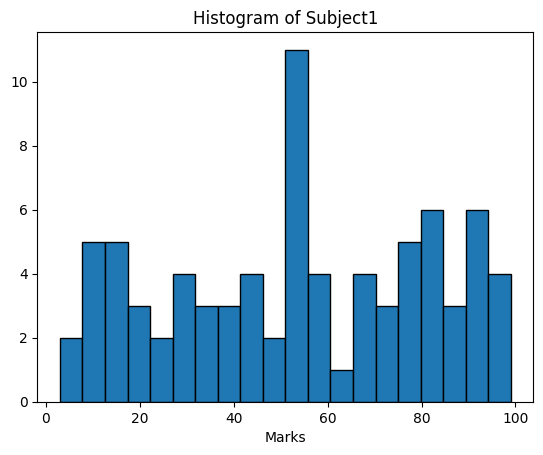

In [17]:
# Plot a histogram for SubjectX (choose a specific subject number)
import matplotlib.pyplot as plt
plt.hist(student_marks["Subject1"], bins=20,edgecolor="k")
plt.title(f'Histogram of Subject1')
plt.xlabel('Marks')
plt.show()

<Axes: ylabel='Subject1'>

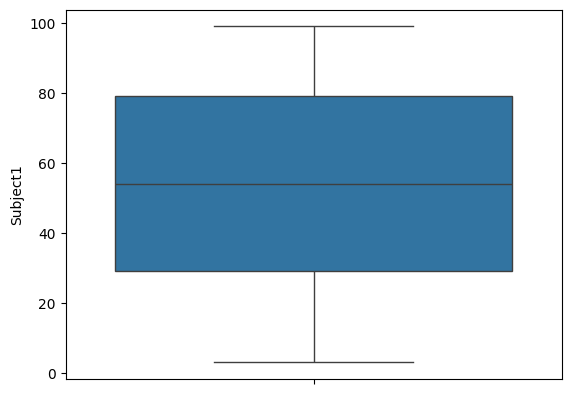

In [18]:
import seaborn as sns
sns.boxplot(student_marks['Subject1'])

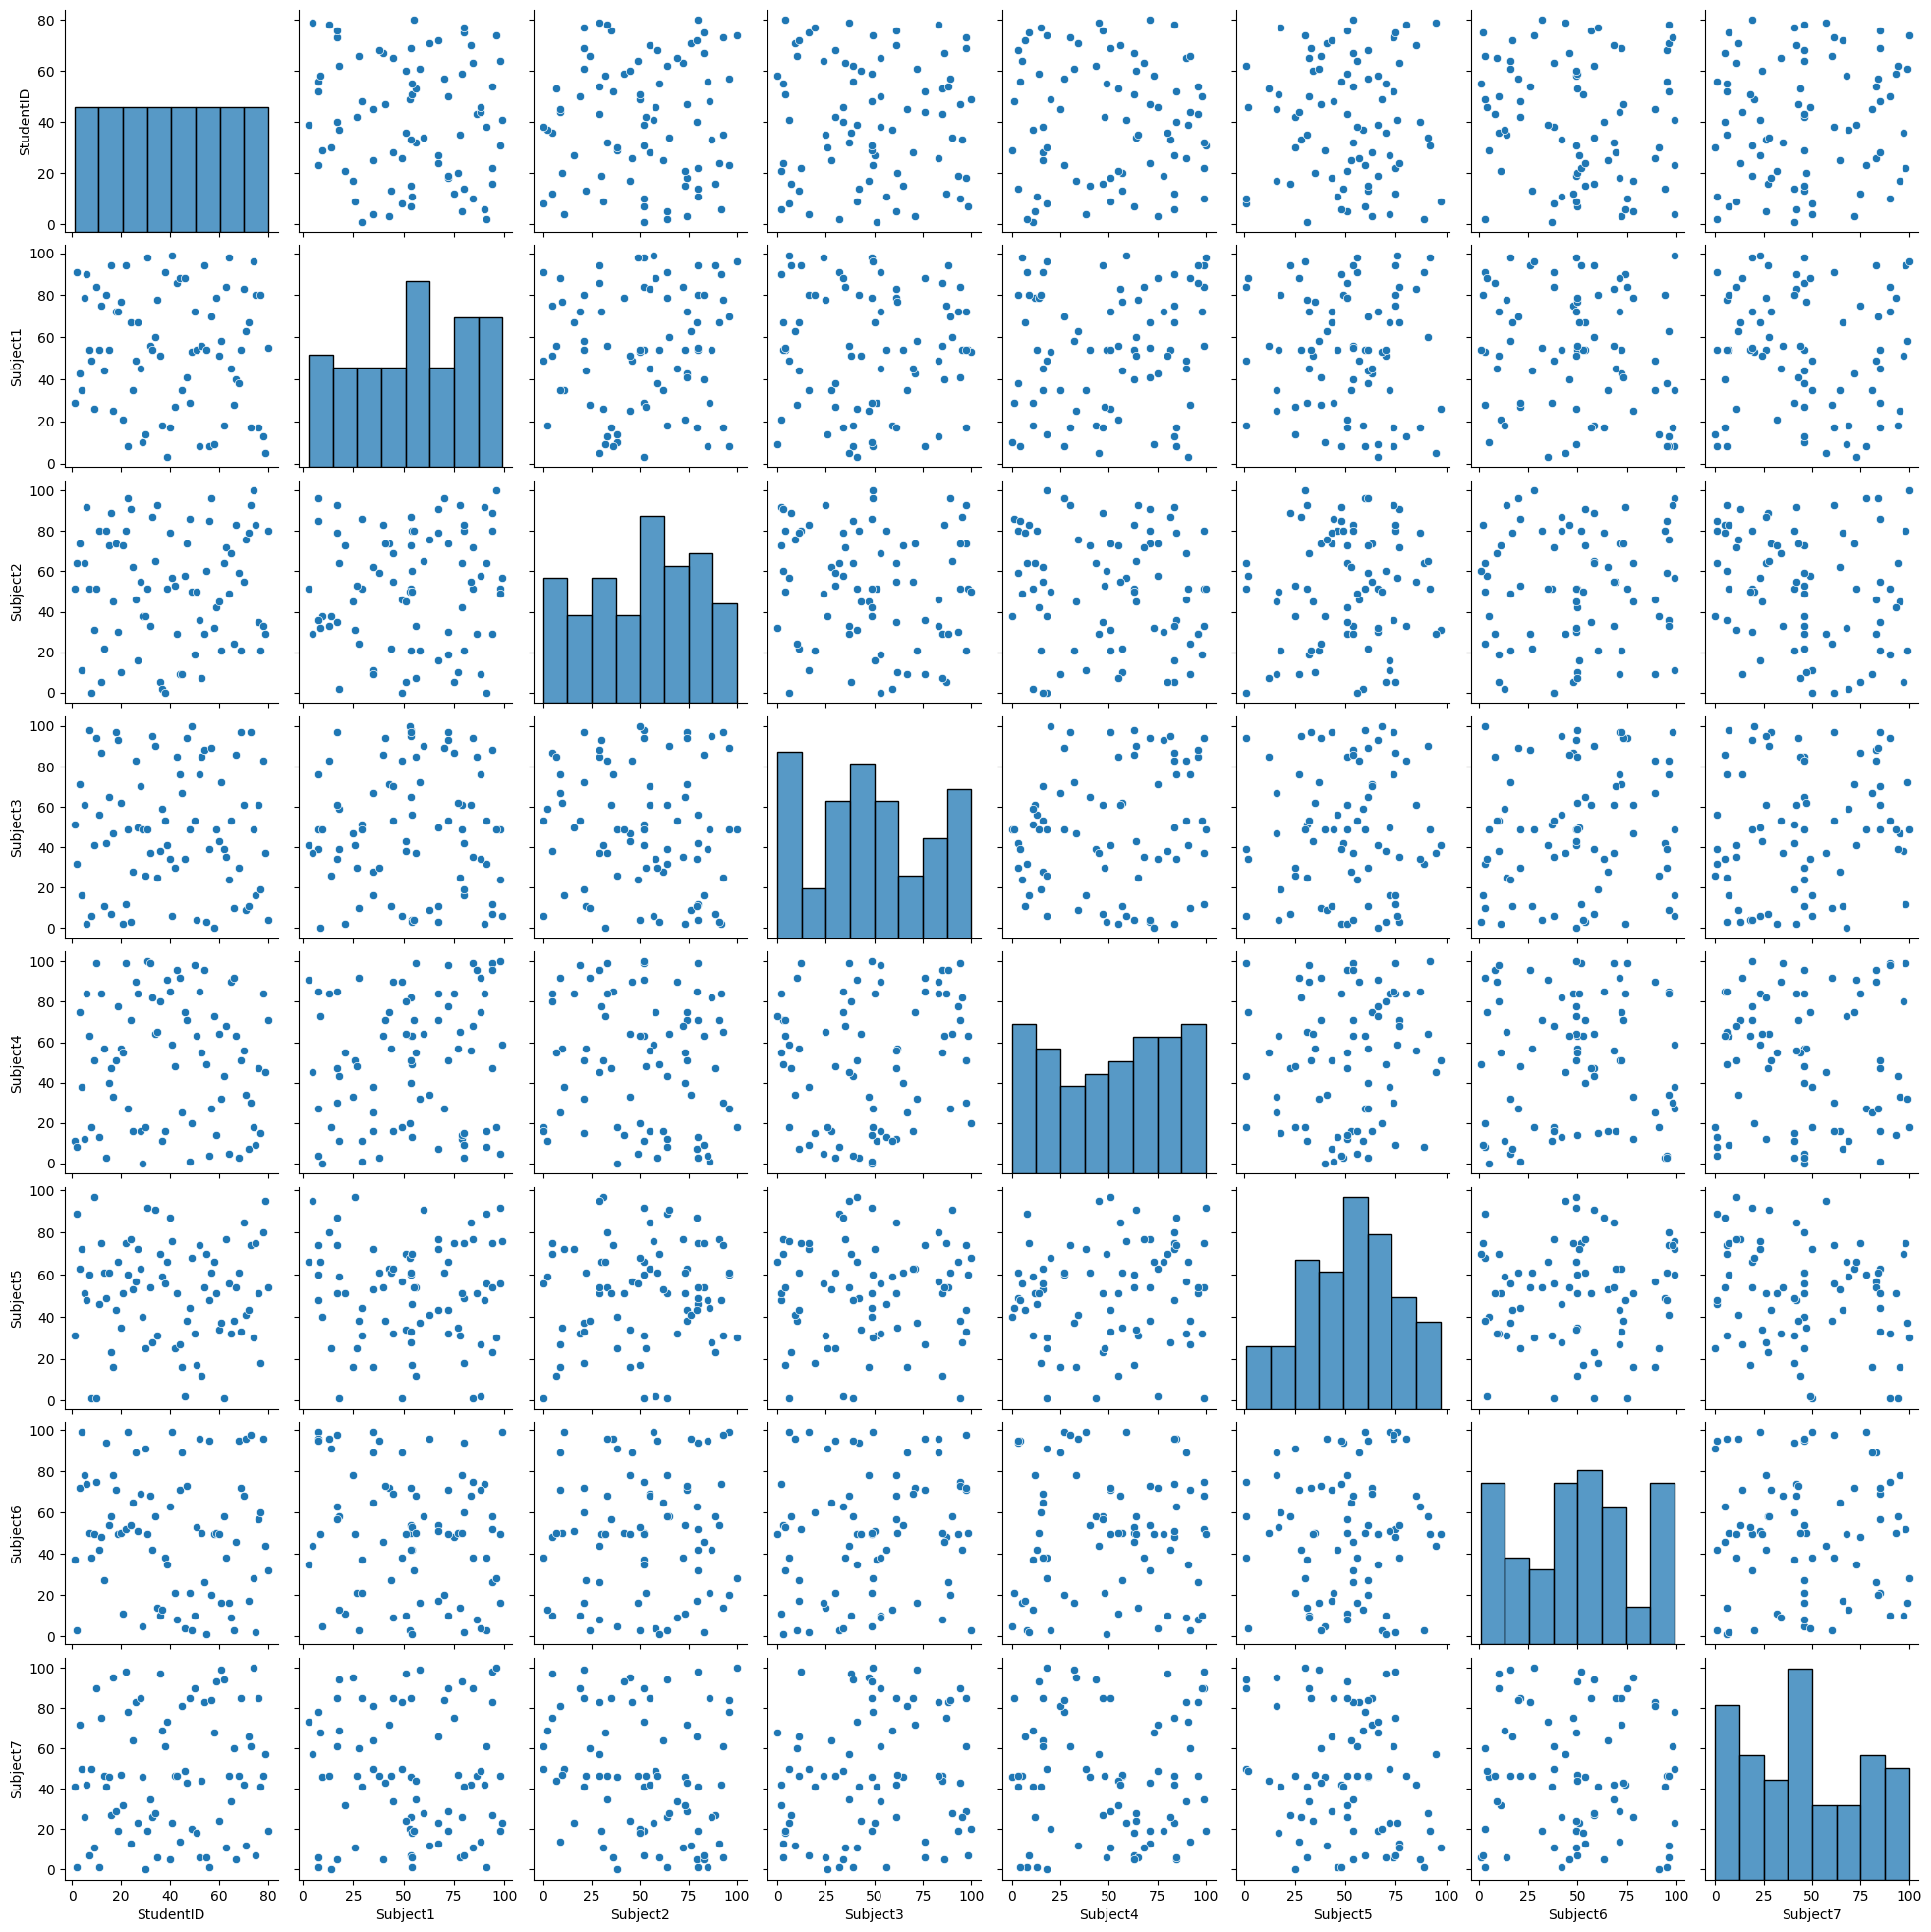

In [19]:
import seaborn as sns
sns.pairplot(student_marks)

In [20]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal')
Xt=discretizer.fit_transform(student_marks)
Xt=pd.DataFrame(Xt,index=student_marks.index,columns=student_marks.columns)
Xt.head()

,StudentID,Subject1,Subject2,Subject3,Subject4,Subject5,Subject6,Subject7
0,0.0,1.0,2.0,2.0,0.0,1.0,1.0,2.0
1,0.0,4.0,3.0,1.0,0.0,4.0,0.0,0.0
2,0.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0
3,0.0,1.0,0.0,1.0,1.0,3.0,4.0,3.0
4,0.0,3.0,3.0,3.0,0.0,2.0,4.0,1.0


<h1 style='text-align: left;'>Model Selection</h1>

In [21]:
#Training the dataset and implementing the model
X=Xt.drop(columns=["Subject6","StudentID"])
y=Xt["Subject6"].values.reshape((-1,1))
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [22]:
X_train.shape

(64, 6)

In [23]:
y_train.shape

(64, 1)

In [24]:
X_test.shape

(16, 6)

In [25]:
y_test.shape

(16, 1)

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)
model

LinearRegression()

In [27]:
y_pred=lr.predict(X_test)
print(y_pred)

[[2.17475295]
 [1.95604394]
 [1.80182196]
 [1.91745663]
 [2.21651007]
 [2.28140863]
 [1.52025833]
 [2.12093353]
 [1.35941623]
 [2.46728826]
 [2.14414258]
 [2.12575539]
 [1.96083693]
 [2.29870268]
 [2.05016034]
 [1.83279249]]


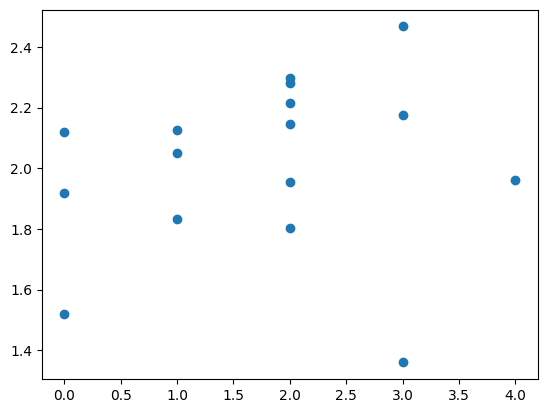

In [28]:
plt.scatter(y_test,y_pred)
plt.show()

<h1 style='text-align: left;'>Mean Squared Error</h1>

In [29]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.3526049833786282


<h3 style='text-align: left;'>Analysis</h3>
<ul>
    <li>We used <b>Multiple Linear Regression</b> to calculate the Subject6 marks.</li>
    <li>The model gives us the <b>Mean Squared Error</b> of 2.9813727479995364</li>
</ul>